In [27]:
import numpy as np
TestPerf = np.load("GeoShapes_Curriculum_FullUniform_TestPerf_ExpChange.npy")
ValError = np.load("GeoShapes_Curriculum_FullUniform_ValAcc_ExpChange.npy")

In [28]:
this = np.sum(np.sum(TestPerf,axis=0),axis=0)
NumComplete = 0
while this[NumComplete] >0:
    NumComplete +=1
print(NumComplete)

12


In [29]:
TestPerf = TestPerf[:,:,0:NumComplete]
ValError = ValError[:,:,0:NumComplete]

In [30]:
TestPerf_Mean = TestPerf.mean(axis=2)
TestPerf_StE = TestPerf.std(axis=2) / np.sqrt(NumComplete)

In [31]:
TestPerf_Mean

array([[0.61846077, 0.8364    ],
       [0.54014317, 0.82448334],
       [0.95030099, 0.75443332],
       [0.68034561, 0.79525001],
       [0.58562433, 0.83801667]])

In [32]:
TestPerf_Mean + TestPerf_StE

array([[0.63979741, 0.84201387],
       [0.554133  , 0.82871565],
       [0.96434326, 0.75715819],
       [0.68741756, 0.79761176],
       [0.59470335, 0.84036276]])

In [33]:
TestPerf_Mean - TestPerf_StE

array([[0.59712414, 0.83078613],
       [0.52615334, 0.82025102],
       [0.93625872, 0.75170846],
       [0.67327367, 0.79288826],
       [0.57654532, 0.83567058]])

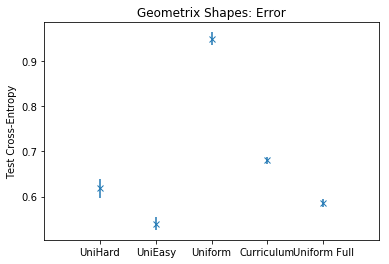

In [35]:
import matplotlib.pyplot as plt

flag = 0

labels = ['Hard','Easy','Uni','Curriculum']
plt.errorbar(np.array([1,2,3,4,5],dtype=int),TestPerf_Mean[:,flag],yerr = TestPerf_StE[:,flag],marker ='x',linestyle='none')
my_xticks = ['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
thisplot = plt.gca()
thisplot.set_xlim(0,6)
if flag == 0:
    thisplot.set_title('Geometrix Shapes: Error')
    thisplot.set_ylabel('Test Cross-Entropy')
else:
    thisplot.set_title('Geometrix Shapes: Accuracy')
    thisplot.set_ylabel('Test Accuracy')

plt.show()

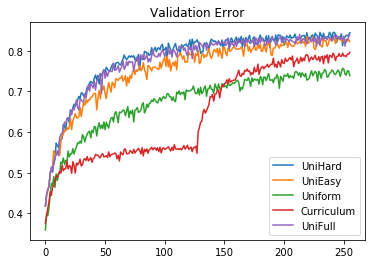

In [10]:
plt.plot(np.mean(ValError,axis=2))
plt.legend(['UniHard','UniEasy','Uniform','Curriculum','UniFull'],loc='best')
thisplot = plt.gca()
thisplot.set_title('Validation Error')
plt.show()

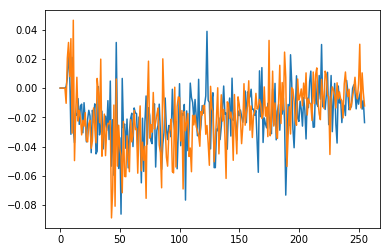

In [13]:
Diff = ValError[:,1] - ValError[:,-1]
plt.plot(Diff)
plt.show()

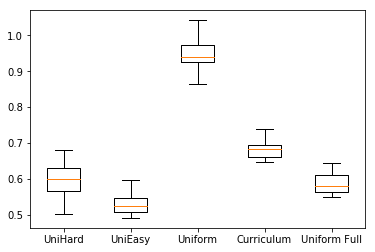

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data = TestPerf[:,0,:]
ax.boxplot(data.T)
my_xticks =['UniHard','UniEasy','Uniform','Curriculum','Uniform Full']
plt.xticks(np.array([1,2,3,4,5],dtype=int), my_xticks)
plt.show()